In [1]:
import os
#os.chdir('..')
print("Current Working Directory " , os.getcwd())
import sys
sys.path.append("../") # Add directory containing src/data to path
import numpy as np
from utils import *

Current Working Directory  /nfs/homedirs/zhz/uncertainty-quantification/dataset_analyze


In [2]:
path = '/lab/project-1/mapilary_data'
os.listdir(path)
anno_path = '/lab/project-1/annotation/mtsd_v2_fully_annotated/annotations'
split_path = '/lab/project-1/annotation/mtsd_v2_fully_annotated/splits'


In [3]:
# get image key of 3 datasets
f = open(split_path+'/train.txt', 'r')
train_images = f.read().splitlines()
f.close()

f = open(split_path+'/val.txt', 'r')
val_images = f.read().splitlines()
f.close()

f = open(split_path+'/test.txt', 'r')
test_images = f.read().splitlines()
f.close()

In [4]:
# annos is a large list of tuple, first component is key of image, seconde is annotations 
train_keys, train_annos = split_annos(train_images, anno_path)
val_kays, val_annos = split_annos(val_images, anno_path)
test_keys, test_annos = split_annos(test_images, anno_path) # Note, annotations dont have information of test set!!!

In [48]:
train_set= list(zip(train_keys, train_annos))

In [50]:
train_set[0][0]

'92CaCXDyZJrZUiTNiv4nnw'

In [6]:
train_annos[1]

{'width': 5312,
 'height': 2988,
 'ispano': False,
 'objects': [{'key': '38math41tc4soi2450ewf5',
   'label': 'regulatory--no-overtaking--g5',
   'bbox': {'xmin': 2443.3125,
    'ymin': 1956.498046875,
    'xmax': 2477.03125,
    'ymax': 1989.3251953125},
   'properties': {'barrier': False,
    'occluded': False,
    'out-of-frame': False,
    'exterior': False,
    'ambiguous': False,
    'included': False,
    'direction-or-information': False,
    'highway': False,
    'dummy': False}}]}

In [6]:
len(val_annos)

5320

In [7]:
len(test_images)

10544

In [8]:
print(train_annos[1])
print(train_keys[1])

{'width': 5312, 'height': 2988, 'ispano': False, 'objects': [{'key': '38math41tc4soi2450ewf5', 'label': 'regulatory--no-overtaking--g5', 'bbox': {'xmin': 2443.3125, 'ymin': 1956.498046875, 'xmax': 2477.03125, 'ymax': 1989.3251953125}, 'properties': {'barrier': False, 'occluded': False, 'out-of-frame': False, 'exterior': False, 'ambiguous': False, 'included': False, 'direction-or-information': False, 'highway': False, 'dummy': False}}]}
iTtFIUV0mXcvmAcZcuW9Nw


In [9]:
# Statistics for all labels
from collections import Counter
labels = []
for i in range(len(train_annos)):
    for obj in train_annos[i]['objects']:
        labels.append(obj['label'])

feature = Counter(labels) # feature is a dict containing types and numbers of labels
feature_list = list(feature)

In [10]:
feature

Counter({'other-sign': 118782,
         'regulatory--no-overtaking--g5': 332,
         'warning--pedestrians-crossing--g4': 985,
         'regulatory--no-parking--g5': 513,
         'complementary--maximum-speed-limit-45--g1': 121,
         'warning--double-curve-first-right--g2': 105,
         'regulatory--no-heavy-goods-vehicles--g2': 384,
         'regulatory--shared-path-pedestrians-and-bicycles--g1': 211,
         'regulatory--go-straight--g1': 423,
         'regulatory--yield--g1': 2428,
         'complementary--chevron-left--g1': 1570,
         'information--bike-route--g1': 85,
         'complementary--one-direction-left--g1': 78,
         'warning--turn-left--g1': 110,
         'warning--bicycles-crossing--g2': 75,
         'regulatory--one-way-straight--g1': 465,
         'warning--railroad-intersection--g3': 98,
         'warning--railroad-crossing--g4': 70,
         'warning--junction-with-a-side-road-acute-right--g1': 81,
         'complementary--maximum-speed-limit-25--g1

In [11]:
def split_g(label:str):
    '''
    Note: this is only for signs infor, warn, comple, regu
    to split signs with same g value
    we have g1-12, g15, g25, g45 in total 15
    
    '''
    num = 99
    if label[-2] == 'g':
        num = int(label[-1])-1
    elif (label[-2:]<='12'):
        num = int(label[-2:])-1
    elif (label[-2:]>'12'):
        if label[-2:]=='15':
            num = 12
        elif label[-2:] == '25':
            num = 13
        elif label[-2:] == '45':
            num = 14
        else:
            print('error', label)
    else:
        print('error', label)
    return num

In [12]:
# sign label counts
oth_counts = 0
info_counts = [0 for i in range(15)]
warn_counts = [0 for i in range(15)]
comp_counts = [0 for i in range(15)]
regu_counts = [0 for i in range(15)]
# sign number counts
info_num = [0 for i in range(15)]
warn_num = [0 for i in range(15)]
comp_num = [0 for i in range(15)]
regu_num = [0 for i in range(15)]
for label, counts in dict(feature).items():
    if label[:3] == 'oth':
        oth_counts += 1
    elif label[:3] == 'inf':
        info_counts[split_g(label)] += 1
        info_num[split_g(label)] += counts
    elif label[:3] == 'war':
        warn_counts[split_g(label)] += 1
        warn_num[split_g(label)] += counts
    elif label[:3] == 'com':
        comp_counts[split_g(label)] += 1
        comp_num[split_g(label)] += counts
    elif label[:3] == 'reg':
        regu_counts[split_g(label)] += 1
        regu_num[split_g(label)] += counts
    else:
        print('error')

In [13]:
print(warn_counts)
print(warn_num)

[64, 31, 19, 11, 1, 2, 1, 0, 2, 1, 1, 1, 0, 1, 0]
[6657, 4078, 1488, 1387, 167, 119, 68, 0, 180, 46, 26, 13, 0, 104, 0]


In [14]:
print(comp_counts)
print(comp_num)

[30, 6, 4, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[6233, 1203, 737, 162, 540, 207, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [15]:
print(regu_counts)
print(regu_num)

[102, 37, 21, 6, 4, 3, 0, 1, 0, 1, 0, 0, 1, 0, 0]
[21283, 4037, 2008, 1948, 1041, 96, 0, 39, 0, 45, 0, 0, 1082, 0, 0]


In [16]:
# To get number of each type of signals
# five main classes: other, complementary, warning, information, regulatory
other = []
comp = []
warn = []
inform = []
reg = []
smth=[]
for item in feature_list:
    if item[:4] == 'othe':
        other.append(item)
    elif item[:4] == 'comp':
        comp.append(item)
    elif item[:4] == 'warn':
        warn.append(item)
    elif item[:4] == 'info':
        inform.append(item)
    elif item[:4] == 'regu':
        reg.append(item)
    else:
        smth.append(item)

print('other:', len(other))
print('comp:', len(comp))
print('warn:', len(warn))
print('inform:', len(inform))
print('regulatory:', len(reg))
print('smth:', len(smth))

other: 1
comp: 45
warn: 135
inform: 44
regulatory: 176
smth: 0


In [17]:
# select regulatory signals
# this is for a larger group of labels
reg_no_overtaking_g1 = []
for item in feature_list:
    if item=='regulatory--no-overtaking--g1':
        reg_no_overtaking_g1.append(item)

reg_no_overtaking = []
for item in feature_list:
    if item[:-4]=='regulatory--no-overtaking':
        reg_no_overtaking.append(item)
reg_no_overtaking

['regulatory--no-overtaking--g5',
 'regulatory--no-overtaking--g2',
 'regulatory--no-overtaking--g1',
 'regulatory--no-overtaking--g4']

In [18]:
# for selecting index of label, this can be replaced by function below
reg_no_overtaking_index = [] # idex of all reg signals, this is for finding corresponding image
for i in range(len(train_annos)):
    for j in range(len(train_annos[i]['objects'])):
        if train_annos[i]['objects'][j]['label'] in reg_no_overtaking:
            reg_no_overtaking_index.append((i,j))

In [19]:
def select_index(label:list, train_annos):
    '''
    to select index of specific label
    Input:
    label: list of label we want(can be one or multiple label)
    Output:
    index: list of tuples(i,j), where i=which pic, j=which object
    '''
    index = []
    for i in range(len(train_annos)):
        for j in range(len(train_annos[i]['objects'])):
            if (train_annos[i]['objects'][j]['label'] in label)\
                or (train_annos[i]['objects'][j]['label']==label):
                index.append((i,j))
    return index

In [20]:
reg_no_overtaking_g1_index = select_index(reg_no_overtaking_g1, train_annos)
reg_no_overtaking_g2_index = select_index('regulatory--no-overtaking--g2', train_annos)
reg_no_overtaking_g4_index = select_index('regulatory--no-overtaking--g4', train_annos)
reg_no_overtaking_g5_index = select_index('regulatory--no-overtaking--g5', train_annos)

In [5]:
def signal_image(train_keys, train_annos, index):
    '''
    To select specific signal area of image
    Input
    train_keys: image keys of training data
    train_annos: annotations of training data
    index: Tuple (i,j), i=which pic in train_keys, j=which object in annos
    '''
    i = index[0]
    j = index[1]
    image_key = train_keys[i]

    with Image.open('/lab/project-1/train_img/images/'+'{:s}.jpg'.format(image_key)) as img:
        img = img.convert('RGBA')
        img_draw = ImageDraw.Draw(img)

        rects = Image.new('RGBA', img.size)
        rects_draw = ImageDraw.Draw(rects)

        obj = train_annos[i]['objects'][j]
        x1 = obj['bbox']['xmin']
        y1 = obj['bbox']['ymin']
        x2 = obj['bbox']['xmax']
        y2 = obj['bbox']['ymax']    

        plt.xlim(x1-5, x2+5)
        plt.ylim(y1-5, y2+5)
        # plt.text(x1-1, y1-1, obj['label'],color = 'white')
        

    return img

In [22]:
# for reg_no_overtaking_g1
plt.figure()
plt.subplot(221)
reg_g1_0 = signal_image(train_keys, train_annos, reg_no_overtaking_g1_index[0])
plt.imshow(reg_g1_0)

plt.subplot(222)
reg_g1_1 = signal_image(train_keys, train_annos, reg_no_overtaking_g1_index[1])
plt.imshow(reg_g1_1)

plt.subplot(223)
reg_g1_2 = signal_image(train_keys, train_annos, reg_no_overtaking_g1_index[2])
plt.imshow(reg_g1_2)
plt.subplot(224)
reg_g1_3 = signal_image(train_keys, train_annos, reg_no_overtaking_g1_index[3])
plt.imshow(reg_g1_3)

# plt.title('reg_no_overtaking_g1')
plt.show()

NameError: name 'plt' is not defined

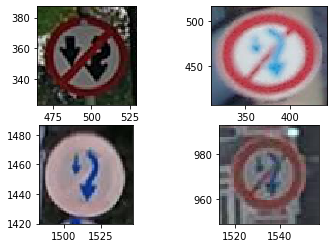

In [ ]:
# for reg_no_overtaking_g2
plt.figure()
plt.subplot(221)
reg_g2_0 = signal_image(train_keys, train_annos, reg_no_overtaking_g2_index[0])
plt.imshow(reg_g2_0)

plt.subplot(222)
reg_g2_1 = signal_image(train_keys, train_annos, reg_no_overtaking_g2_index[1])
plt.imshow(reg_g2_1)

plt.subplot(223)
reg_g2_2 = signal_image(train_keys, train_annos, reg_no_overtaking_g2_index[2])
plt.imshow(reg_g2_2)
plt.subplot(224)
reg_g2_3 = signal_image(train_keys, train_annos, reg_no_overtaking_g2_index[3])
plt.imshow(reg_g2_3)

# plt.title('reg_no_overtaking_g2')
plt.show()


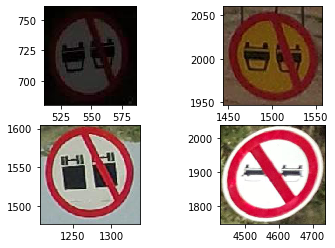

In [ ]:
# for reg_no_overtaking_g4
plt.figure()
plt.subplot(221)
reg_g4_0 = signal_image(train_keys, train_annos, reg_no_overtaking_g4_index[0])
plt.imshow(reg_g4_0)

plt.subplot(222)
reg_g4_1 = signal_image(train_keys, train_annos, reg_no_overtaking_g4_index[1])
plt.imshow(reg_g4_1)

plt.subplot(223)
reg_g4_2 = signal_image(train_keys, train_annos, reg_no_overtaking_g4_index[2])
plt.imshow(reg_g4_2)
plt.subplot(224)
reg_g4_3 = signal_image(train_keys, train_annos, reg_no_overtaking_g4_index[3])
plt.imshow(reg_g4_3)

# plt.title('reg_no_overtaking_g4')
plt.show()

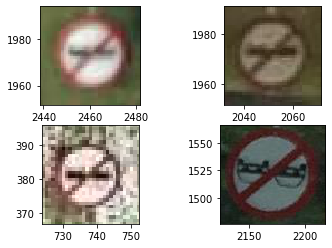

In [ ]:
# for reg_no_overtaking_g5
plt.figure()
plt.subplot(221)
reg_g5_0 = signal_image(train_keys, train_annos, reg_no_overtaking_g5_index[0])
plt.imshow(reg_g5_0)

plt.subplot(222)
reg_g5_1 = signal_image(train_keys, train_annos, reg_no_overtaking_g5_index[1])
plt.imshow(reg_g5_1)

plt.subplot(223)
reg_g5_2 = signal_image(train_keys, train_annos, reg_no_overtaking_g5_index[2])
plt.imshow(reg_g5_2)

# we can see this one is misclassified
plt.subplot(224)
reg_g5_3 = signal_image(train_keys, train_annos, reg_no_overtaking_g5_index[3])
plt.imshow(reg_g5_3)

# plt.title('reg_no_overtaking_g5')
plt.show()

In [ ]:
# same thing for warning, let warning--railroad-intersection as example
warn_railroad_inter = []
for item in feature_list:
    if item[:-4]=='warning--railroad-intersection':
        warn_railroad_inter.append(item)
warn_railroad_inter

['warning--railroad-intersection--g3', 'warning--railroad-intersection--g4']

In [ ]:
warn_railroad_inter_g3_index = select_index('warning--railroad-intersection--g3', train_annos)
warn_railroad_inter_g4_index = select_index('warning--railroad-intersection--g4', train_annos)

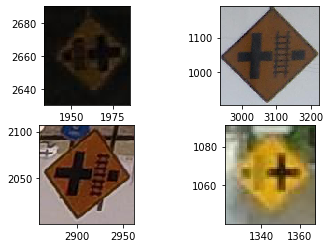

In [ ]:
# plot figure
plt.figure()
plt.subplot(221)
warn_ra_int_g30 = signal_image(train_keys, train_annos, warn_railroad_inter_g3_index[0])
plt.imshow(warn_ra_int_g30)

plt.subplot(222)
warn_ra_int_g31 = signal_image(train_keys, train_annos, warn_railroad_inter_g3_index[1])
plt.imshow(warn_ra_int_g31)

plt.subplot(223)
warn_ra_int_g32 = signal_image(train_keys, train_annos, warn_railroad_inter_g3_index[2])
plt.imshow(warn_ra_int_g32)
plt.subplot(224)
warn_ra_int_g33 = signal_image(train_keys, train_annos, warn_railroad_inter_g3_index[3])
plt.imshow(warn_ra_int_g33)

plt.show()


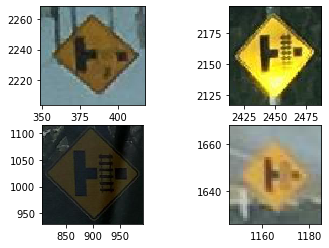

In [ ]:
# plot figure
plt.figure()
plt.subplot(221)
warn_ra_int_g40 = signal_image(train_keys, train_annos, warn_railroad_inter_g4_index[0])
plt.imshow(warn_ra_int_g40)

plt.subplot(222)
warn_ra_int_g41 = signal_image(train_keys, train_annos, warn_railroad_inter_g4_index[1])
plt.imshow(warn_ra_int_g41)

plt.subplot(223)
warn_ra_int_g42 = signal_image(train_keys, train_annos, warn_railroad_inter_g4_index[2])
plt.imshow(warn_ra_int_g42)
plt.subplot(224)
warn_ra_int_g43 = signal_image(train_keys, train_annos, warn_railroad_inter_g4_index[3])
plt.imshow(warn_ra_int_g43)

plt.show()

In [ ]:
# same thing for warning, compare with warning--railroad-crossing as example
warn_railroad_cross = []
for item in feature_list:
    if item[:-4]=='warning--railroad-crossing':
        warn_railroad_cross.append(item)
warn_railroad_cross

['warning--railroad-crossing--g4',
 'warning--railroad-crossing--g3',
 'warning--railroad-crossing--g1']

In [ ]:
warn_railroad_cross_g1_index = select_index('warning--railroad-crossing--g1', train_annos)
warn_railroad_cross_g3_index = select_index('warning--railroad-crossing--g3', train_annos)
warn_railroad_cross_g4_index = select_index('warning--railroad-crossing--g4', train_annos)

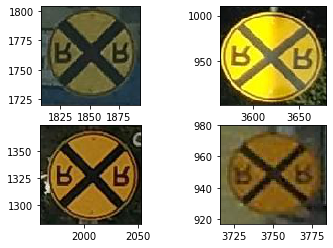

In [ ]:
# plot figure
plt.figure()
plt.subplot(221)
warn_ra_cro_g10 = signal_image(train_keys, train_annos, warn_railroad_cross_g1_index[0])
plt.imshow(warn_ra_cro_g10)

plt.subplot(222)
warn_ra_cro_g11 = signal_image(train_keys, train_annos, warn_railroad_cross_g1_index[1])
plt.imshow(warn_ra_cro_g11)

plt.subplot(223)
warn_ra_cro_g12 = signal_image(train_keys, train_annos, warn_railroad_cross_g1_index[2])
plt.imshow(warn_ra_cro_g12)
plt.subplot(224)
warn_ra_cro_g13 = signal_image(train_keys, train_annos, warn_railroad_cross_g1_index[3])
plt.imshow(warn_ra_cro_g13)

plt.show()


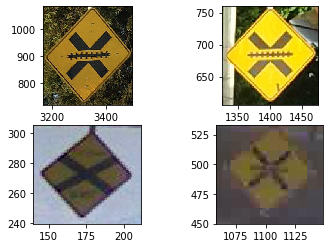

In [ ]:
# plot figure
plt.figure()
plt.subplot(221)
warn_ra_cro_g30 = signal_image(train_keys, train_annos, warn_railroad_cross_g3_index[0])
plt.imshow(warn_ra_cro_g30)

plt.subplot(222)
warn_ra_cro_g31 = signal_image(train_keys, train_annos, warn_railroad_cross_g3_index[1])
plt.imshow(warn_ra_cro_g31)

plt.subplot(223)
warn_ra_cro_g32 = signal_image(train_keys, train_annos, warn_railroad_cross_g3_index[2])
plt.imshow(warn_ra_cro_g32)
plt.subplot(224)
warn_ra_cro_g33 = signal_image(train_keys, train_annos, warn_railroad_cross_g3_index[3])
plt.imshow(warn_ra_cro_g33)

plt.show()

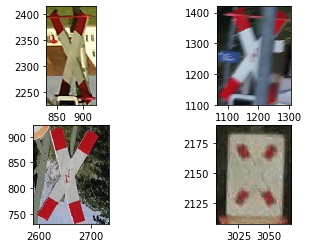

In [ ]:
# plot figure
plt.figure()
plt.subplot(221)
warn_ra_cro_g40 = signal_image(train_keys, train_annos, warn_railroad_cross_g4_index[0])
plt.imshow(warn_ra_cro_g40)

plt.subplot(222)
warn_ra_cro_g41 = signal_image(train_keys, train_annos, warn_railroad_cross_g4_index[1])
plt.imshow(warn_ra_cro_g41)

plt.subplot(223)
warn_ra_cro_g42 = signal_image(train_keys, train_annos, warn_railroad_cross_g4_index[2])
plt.imshow(warn_ra_cro_g42)
plt.subplot(224)
warn_ra_cro_g43 = signal_image(train_keys, train_annos, warn_railroad_cross_g4_index[3])
plt.imshow(warn_ra_cro_g43)

plt.show()

4


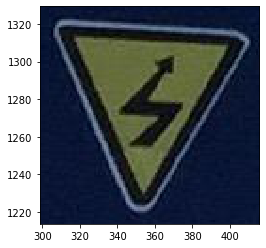

27


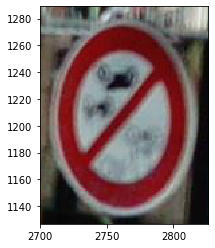

In [38]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mping
obj = []
n = 0
for i in range(len(train_keys)):
    # if n>1:
    #     break
    # else:
    for j in range(len(train_annos[i]['objects'])):
        if train_annos[i]['objects'][j]['properties']['dummy']==True:
            print(i)
            img = signal_image(train_keys, train_annos, (i,j))
                
            plt.imshow(img)     
            plt.show() 
            n+=1

In [41]:
train_keys[4]

'_urmXo7SJvol2Wi4q9fevQ'

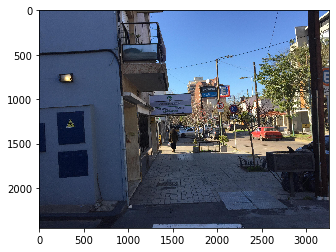

In [42]:
ba = Image.open('/lab/project-1/train_img/images/'+'{:s}.jpg'.format(train_keys[4]))
plt.imshow(ba)